In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,Y = make_classification(n_classes=3,n_samples=200,n_features=2,n_informative=2,random_state=97,n_clusters_per_class=1,n_redundant=0)
Y[Y==0] = -1
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
class svm:
    def __init__(self,c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    
    def HingeLoss(self,w,b,X,Y):
        loss = 0.0
        loss += 0.5*(np.dot(w,w.T))
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(w,X[i].T)+b)
            loss += self.c*(max(0,1-ti))
            
        return loss[0][0]
    def fit (self,X,Y,learning_rate = 0.001,batch_size = 100,max_itr = 100):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        n = learning_rate
        c = self.c
        loss = []
        
        w = np.zeros((1,no_of_features))
        b = 0.0
        
        for k in range(max_itr):
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            l = self.HingeLoss(w,b,X,Y)
            loss.append(l)
            for i in range(0,no_of_samples,batch_size):
                gradw = 0.0
                gradb = 0.0
                
                for j in range(i,i+batch_size):
                    if j<no_of_samples:
                        index = ids[j]
                        ti =  Y[index]*(np.dot(w,X[index].T)+b)
                        if ti<1:
                            gradw += c*(np.dot(Y[index],X[index]))
                            gradb += c*(Y[index])

                gradw = w -gradw
                w = w - learning_rate*(gradw)
                b = b + learning_rate*(gradb)
        self.w = w
        self.b = b
        return w,b,loss        

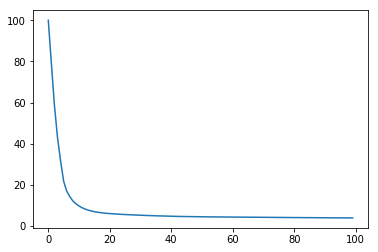

In [6]:
MySVM = svm(0.5)
w,b,loss = MySVM.fit(X,Y)
plt.plot(loss)

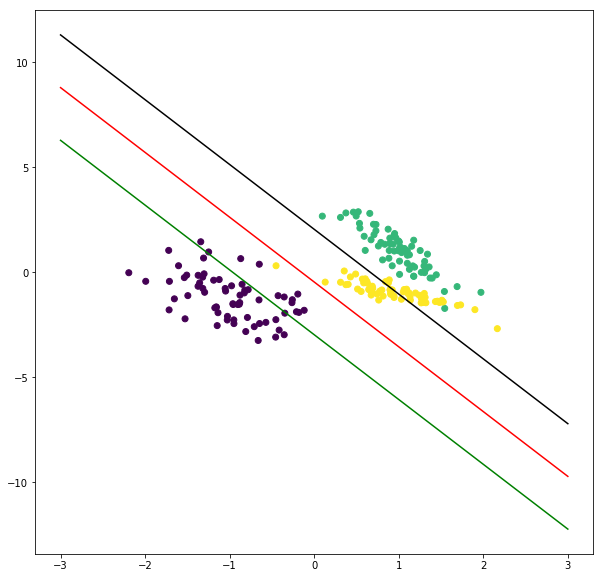

In [4]:
def PlotHyperPlane(w1,w2,b):
    plt.figure(figsize=(10,10))
    x1= np.linspace(-3,3,10)
    x2 = -(x1*w1+b)/w2
    xp = -(x1*w1+b+1)/w2
    xn = -(x1*w1+b-1)/w2
    plt.plot(x1,x2,c = 'red')
    plt.plot(x1,xp,c = 'green')
    plt.plot(x1,xn,c = 'black')
    plt.scatter(X[:,0],X[:,1],c = Y)
    plt.show()
PlotHyperPlane(w[0][0],w[0][1],b)